This notebook walks through the `tvolib.matplotlib_utils` module.

# Custom Formatting

When the module is imported, it tells `matplotlib` to use a custom stylesheet defined at `tvolib/src/matplotlib_utils/data/tvolib.stylesheet`. By default, `matplotlib` plots look like the following

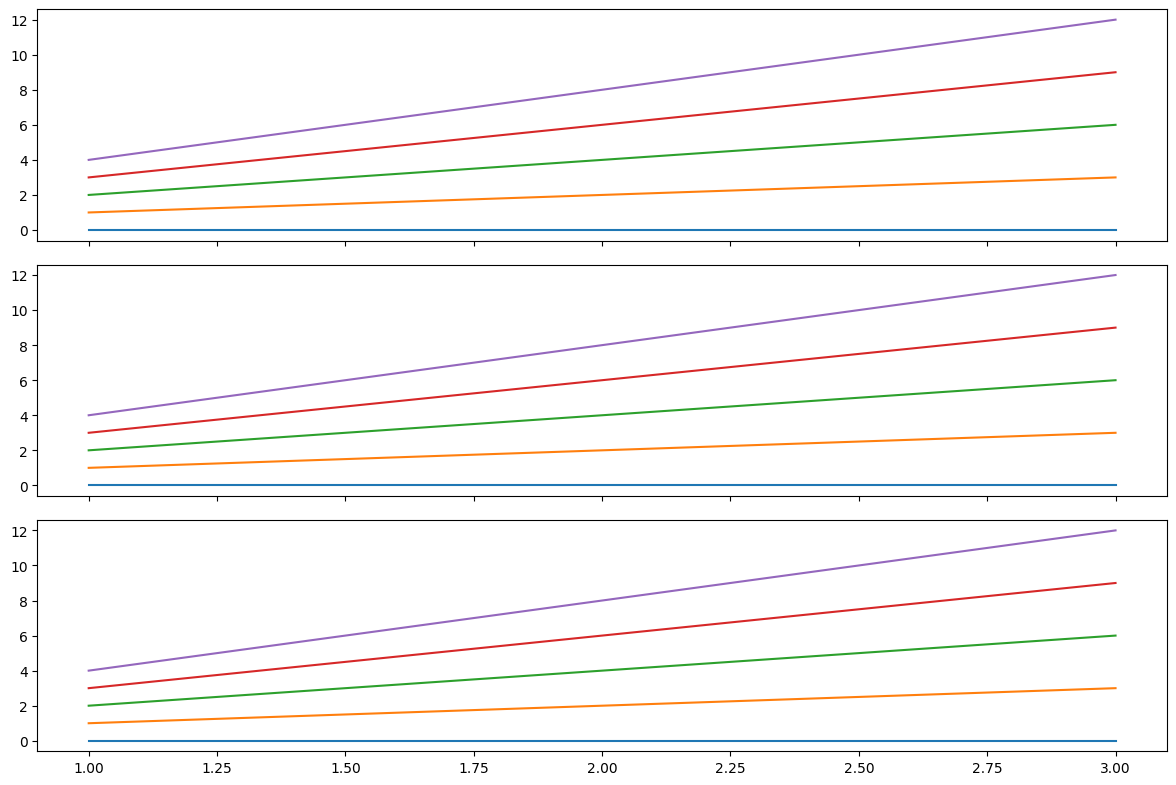

In [1]:
def plot_and_show():
    x = np.array([1,2,3])
    
    fig, axes = plt.subplots(3, 1, figsize=(12, 8), sharex=True)
    for i in range(axes.size):
        for j in range(5):
            axes[i].plot(x, j * x)
    
    fig.tight_layout()
    plt.show()

import numpy as np
import matplotlib.pyplot as plt

plot_and_show()

By simply importing `tvolib.matplotlib_utils`, above plots are formatted as follows.

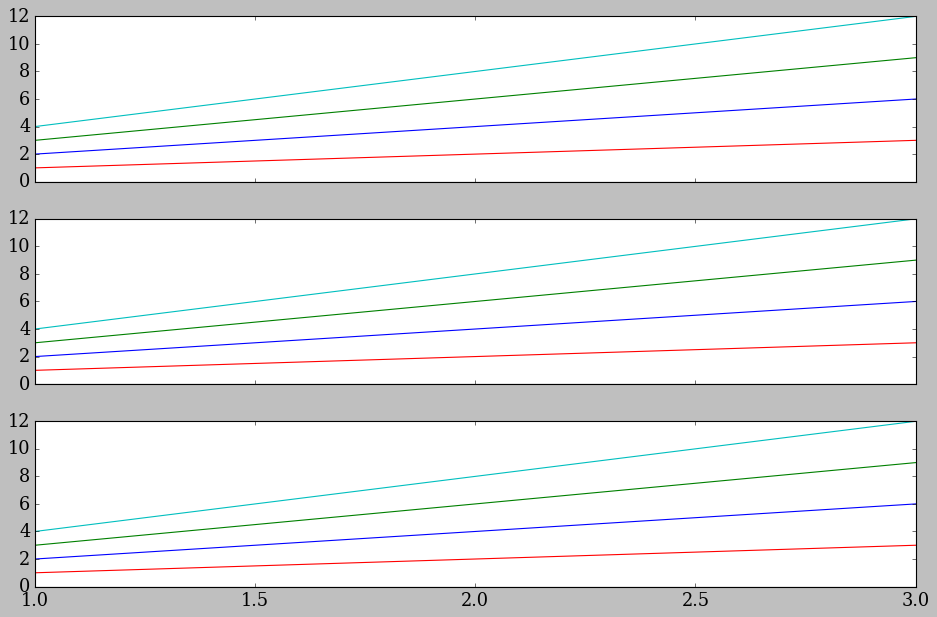

In [2]:
import tvolib.matplotlib_utils as mu

plot_and_show()

Some notable changes are:
- Ticks are inwards.
- Labels are 12-point.
- Default color cycle is (r, g, b, ...)
- The abscissa range is not padded.
- Non-axes background is gray (but is transparent in exported figures) for easier interactive analysis (great when used together with [pyspedas](https://github.com/spedas/pyspedas).

# "Better" colormaps

`tvolib.matplotlib_utils` also imports perceptually uniform colormaps from [colorcet](https://colorcet.holoviz.org/). Let us compare the typical "rainbow" colormap from `matplotlib` and the `colorcet` version.

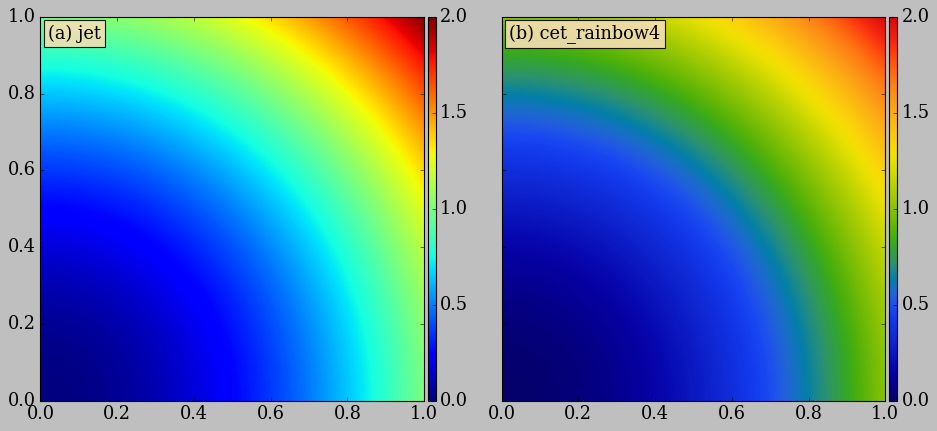

In [3]:
x = np.linspace(0, 1, 1000)
Xg, Yg = np.meshgrid(x, x, indexing="ij")
colors = Xg**2 + Yg**2

fig, axes = mu.plt.subplots(1, 2, figsize=(12, 8), sharex=True, sharey=True)

titles = ["jet", "cet_rainbow4"]
panels = ["(a)", "(b)"]
for (i, title) in enumerate(titles):
    cax = mu.add_colorbar(ax := axes[i])
    im = ax.pcolormesh(Xg, Yg, colors, cmap=title)
    cb = fig.colorbar(im, cax=cax)

    ax.set_xlim(x[0], x[-1])
    ax.set_ylim(x[0], x[-1])
    ax.set_aspect("equal")
    mu.add_panel_label(ax, 0.02, 0.98, f"{panels[i]} {title}", va="top")

fig.tight_layout()

In (a), the middle blue, cyan, and yellow are very sharp and well-defined. This is due to the fact that "jet" is not perceptually uniform. In opposite, "cet_rainbow4" from `colorcet` in (b) has less artificial contrast between the blue/green and green/red than "jet".

It is arguable which is better, but I agree with the [research done on "cet_rainbow4"](https://arxiv.org/abs/1509.03700) and prefer it over "jet". So I have added support for `colorcet` in `tvolib.matplotlib_utils`.

## Colorbar support

Also, note in the previous cell that this module adds a helper routine `tvolib.matplotlib_utils.add_colorbar` to aid with heatmap plots such as the above. To add a colorbar to an `Axes` subplot, simply follow the below steps:

- Create a child `Axes` with `cax = mu.add_colorbar(ax, ...)`
- Plot the data onto `ax`. Remember to save the mesh image `im = ax.pcolormesh(...)`
- Draw the colorbar onto the child `Axes` with `cb = fig.colorbar(im, cax=cax)`

For more information, see the documentation for `mu.add_colorbar` below.

In [4]:
help(mu.add_colorbar)

Help on function add_colorbar in module tvolib.matplotlib_utils._format:

add_colorbar(ax: matplotlib.axes._axes.Axes, where: str = 'right', pad: float = 0.05, size: str = '2%') -> matplotlib.axes._axes.Axes
    Adds colorbar next to a given `Axes` instance. See `matplotlib`
    documentation for `where`, `pad`, and `size` options.

    Parameters
    ----------
    ax: `matplotlib.axes.Axes`
        The `Axes` instance to draw on.
    where: str
        Where to append the colorbar with respective to the `Axes`.
    pad: str
        Padding of the colorbar from the `Axes`.
    size: str
        Size of the colorbar relative to the `Axes`.

    Return
    ------
    cax: `matplotlib.axes.Axes`
        A child `Axes` instance created relative to the input `Axes` for
        drawing the colorbar.



## Panel label support

Often in publication figures, we need to name the panels. The above example also demonstrates the usage of another helper routine, `tvolib.matplotlib_utils.add_panel_label`. See below documentation.

In [5]:
help(mu.add_panel_label)

Help on function add_panel_label in module tvolib.matplotlib_utils._format:

add_panel_label(ax: matplotlib.axes._axes.Axes, x: float, y: float, text: str, box_format: dict = {'facecolor': 'wheat', 'alpha': 0.9}, **kwargs) -> None
    Adds a boxed text to an `Axes` instance. Intended for drawing panel
    annotations for a figure.

    Parameters
    ----------
    ax: `matplotlib.axes.Axes`
        The `Axes` instance to draw on.
    x, y: float
        Location of the text.
    text: str
        Content of the the text.
    box_format: dict
        Formatting of the enclosing box.
    kwargs: dict
        Other options for `Axes.text` method.

